# TUGAS BIG DATA
Neural Network 
NIM : 1182002002 
Nama : Febby Novanti Azhara

Sumber code : https://www.kaggle.com/bulentsiyah/heart-disease-prediction-using-neural-networks

Sumber data : https://www.kaggle.com/ronitf/heart-disease-uci

# Import Library

In [88]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Keras: {}'.format(keras.__version__))

Python: 3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 16:07:37) 
[GCC 9.3.0]
Pandas: 1.2.4
Numpy: 1.19.5
Sklearn: 0.23.2
Matplotlib: 3.4.2
Keras: 2.4.3


In [89]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

# Input Dataset

In [90]:
data = pd.read_csv('../input/heart-disease-uci/heart.csv')
print( 'Shape of DataFrame: {}'.format(data.shape))
print (data.loc[1])

Shape of DataFrame: (303, 14)
age          37.0
sex           1.0
cp            2.0
trestbps    130.0
chol        250.0
fbs           0.0
restecg       1.0
thalach     187.0
exang         0.0
oldpeak       3.5
slope         0.0
ca            0.0
thal          2.0
target        1.0
Name: 1, dtype: float64


In [91]:
data.loc[50:65]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
50,51,0,2,130,256,0,0,149,0,0.5,2,0,2,1
51,66,1,0,120,302,0,0,151,0,0.4,1,0,2,1
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1
53,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2,1
55,52,1,1,134,201,0,1,158,0,0.8,2,1,2,1
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1
57,45,1,0,115,260,0,0,185,0,0.0,2,0,2,1
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2,1


In [92]:
redata = data[~data.isin(['?'])]
redata.loc[50:65]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
50,51,0,2,130,256,0,0,149,0,0.5,2,0,2,1
51,66,1,0,120,302,0,0,151,0,0.4,1,0,2,1
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1
53,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2,1
55,52,1,1,134,201,0,1,158,0,0.8,2,1,2,1
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1
57,45,1,0,115,260,0,0,185,0,0.0,2,0,2,1
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2,1


In [93]:
redata = redata.dropna(axis=0)
redata.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1,0
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0


In [94]:
print(redata.shape)
print(redata.dtypes)

(303, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [95]:
redata = redata.apply(pd.to_numeric)
redata.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [96]:
redata.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


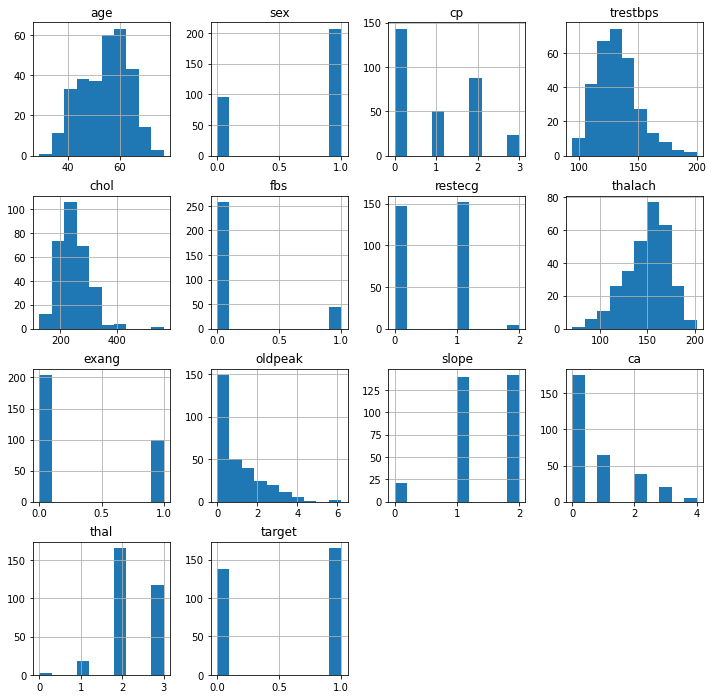

In [97]:
redata.hist(figsize = (12, 12))
plt.show()

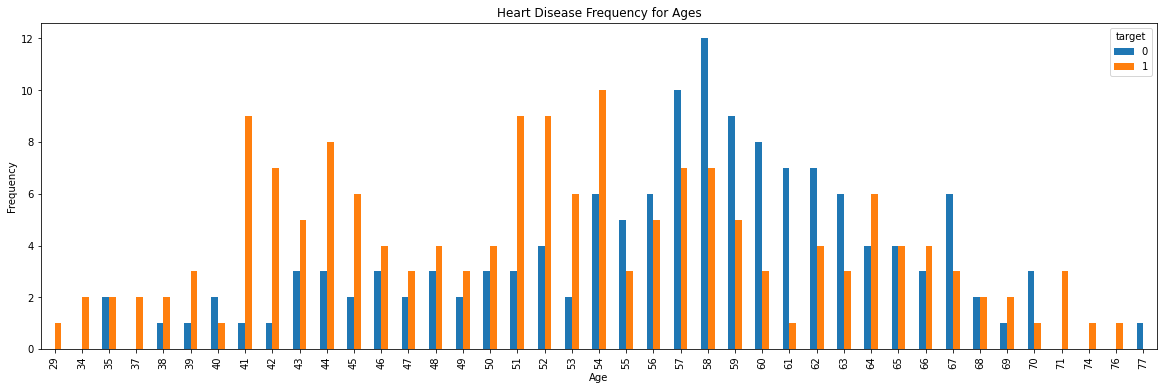

In [98]:
pd.crosstab(redata.age,redata.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

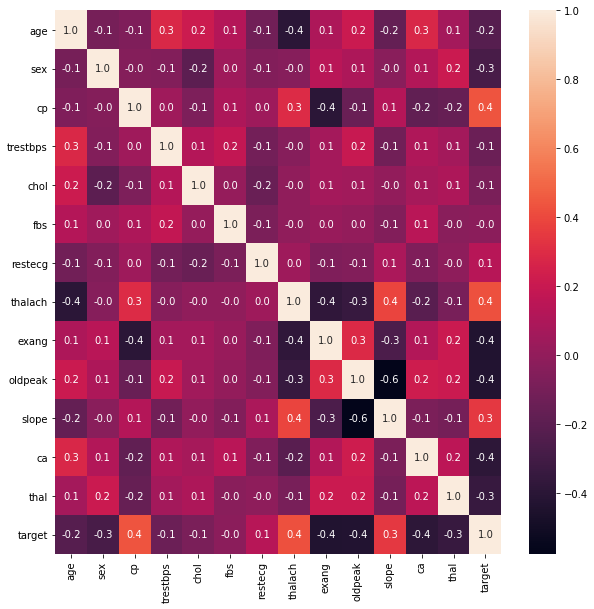

In [99]:
plt.figure(figsize=(10,10))
sns.heatmap(redata.corr(),annot=True,fmt='.1f')
plt.show()

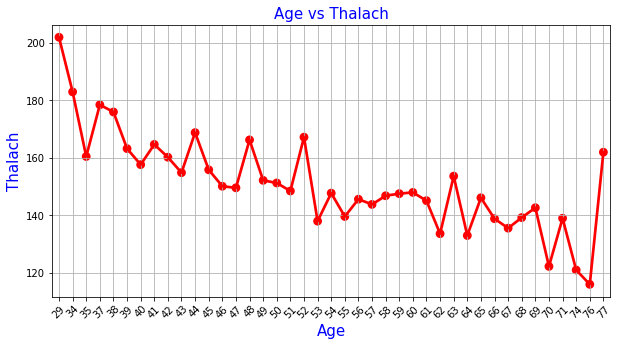

In [100]:
age_unique=sorted(redata.age.unique())
age_thalach_values=redata.groupby('age')['thalach'].count().values
mean_thalach=[]
for i,age in enumerate(age_unique):
    mean_thalach.append(sum(redata[redata['age']==age].thalach)/age_thalach_values[i])
    
plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique,y=mean_thalach,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Thalach',fontsize = 15,color='blue')
plt.title('Age vs Thalach',fontsize = 15,color='blue')
plt.grid()
plt.show()

# Membuat Percobaan dan testing dataset

In [101]:
X = np.array(redata.drop(['target'], 1))
y = np.array(redata['target'])

X[0]

array([ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
         2.3,   0. ,   0. ,   1. ])

In [102]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

X[0]

array([ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
        2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
       -2.27457861, -0.71442887, -2.14887271])

In [103]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

In [104]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(242, 2)
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [105]:
X_train[0]

array([ 1.61392956, -1.46841752,  1.97312292,  0.47839125, -0.14038081,
       -0.41763453,  0.89896224,  0.05917329, -0.69663055,  0.65599028,
        0.97635214,  1.24459328, -0.51292188])

# membangun dan mencoba neural network

In [106]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                224       
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_7 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 18        
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________
None


In [107]:
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=50, batch_size=10)

Epoch 1/50
25/25 [==============================] - 1s 11ms/step - loss: 0.6813 - accuracy: 0.5822 - val_loss: 0.6625 - val_accuracy: 0.6721
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6535 - accuracy: 0.6654 - val_loss: 0.6335 - val_accuracy: 0.7541
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6211 - accuracy: 0.7583 - val_loss: 0.5945 - val_accuracy: 0.7541
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 0.5903 - accuracy: 0.7877 - val_loss: 0.5537 - val_accuracy: 0.7705
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.5508 - accuracy: 0.7803 - val_loss: 0.5159 - val_accuracy: 0.7869
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 0.4941 - accuracy: 0.8431 - val_loss: 0.4813 - val_accuracy: 0.7869
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.4500 - accuracy: 0.8277 - val_loss: 0.4534 - val_accuracy: 0.7869
Epoch 8/50
25/25 [=

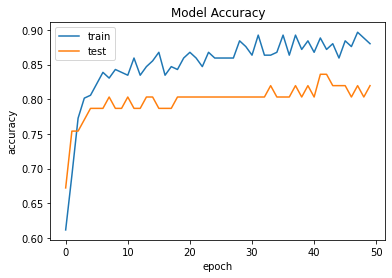

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

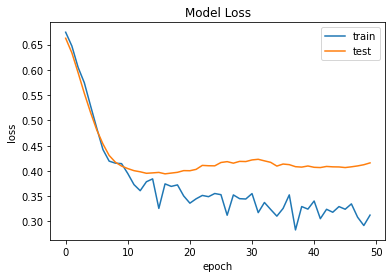

In [109]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Meningkatkan Hasil - Masalah Klasifikasi Biner

In [110]:
# convert into binary classification problem - heart disease or no heart disease
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:20])

[1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1]


In [111]:
# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                224       
_________________________________________________________________
dropout_8 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_9 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________
None


In [112]:
# fit the binary model on the training data
history=binary_model.fit(X_train, Y_train_binary, validation_data=(X_test, Y_test_binary), epochs=50, batch_size=10)

Epoch 1/50
25/25 [==============================] - 1s 11ms/step - loss: 0.6878 - accuracy: 0.5707 - val_loss: 0.6719 - val_accuracy: 0.7377
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6627 - accuracy: 0.7202 - val_loss: 0.6437 - val_accuracy: 0.7377
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6237 - accuracy: 0.7741 - val_loss: 0.6022 - val_accuracy: 0.7377
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 0.5730 - accuracy: 0.8595 - val_loss: 0.5602 - val_accuracy: 0.7541
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.5348 - accuracy: 0.8518 - val_loss: 0.5212 - val_accuracy: 0.7705
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 0.4830 - accuracy: 0.8021 - val_loss: 0.4869 - val_accuracy: 0.7705
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.4741 - accuracy: 0.8342 - val_loss: 0.4628 - val_accuracy: 0.7869
Epoch 8/50
25/25 [=

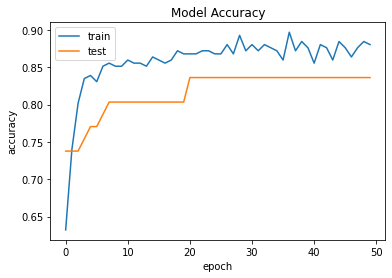

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

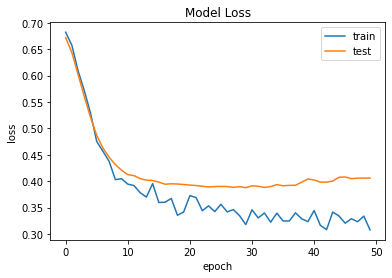

In [114]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Kesimpulan

In [115]:
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

Results for Categorical Model
0.819672131147541
              precision    recall  f1-score   support

           0       0.90      0.68      0.78        28
           1       0.78      0.94      0.85        33

    accuracy                           0.82        61
   macro avg       0.84      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



In [116]:
# generate classification report using predictions for binary model
from sklearn.metrics import classification_report, accuracy_score
# generate classification report using predictions for binary model 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

Results for Binary Model
0.8360655737704918
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        28
           1       0.79      0.94      0.86        33

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61

